# Sprawdźmy ile kół o ustalonym promieniu zmieści się w kwadracie o boku długości jeden.
Miniprojekt został zrobiony z użyciem jądra SageMath. Jest ono używane dla wygody w tworzeniu wykresów.

In [1]:
import numpy as np

Definiujemy metrykę euklidesową - funkcję mierzącą odległości między punktami, w naszym przypadku punktami na płaszczyźnie.

In [2]:
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

Sprawdzamy, czy punkty na liście są - dla każdej pary punktów - w odległości większej, niż 2r. Inaczej mówiąc, sprawdzamy, czy koła o środkach umieszczonych na liście oraz promieniu r nie nachodzą na siebie.

In [3]:
def sprawdz_odleglosc(lista,r): 
    for punkt1 in lista:
        for punkt2 in lista:
            if punkt1 != punkt2:
                if dist(punkt1,punkt2) >= 2*r:
                    continue
                else:
                    return 0
    return 1

Funkcja do sprawdzania, czy konkretny punkt jest w odległości większej od punktów z listy niż 2r, czyli sprawdzenie czy konkretne koło nie pokrywa się z innymi kołami o środkach umieszczonych na liście.

In [4]:
def sprawdz_odleglosc_jeden_pkt(x, lista, r):
    for y in lista:
            if dist(x,y) >= 2*r:
                continue
            else:
                return 0
    return 1

Funkcja rysująca okręgi.

In [5]:
def rysuj_okregi(punkty,r):
    okregi = [ circle(punkt, r,xmin=0,xmax=1,ymin=0,ymax=1) for punkt in punkty]
    return sum(okregi)

Poniżej znajdują się dwie funkcje losujące punkty. Stara i nieużywana - w formie tekstu oraz nowa, z wbudowanym mechanizmem zabezpieczającym przed szukaniem kolejnego koła zbyt wiele razy, kiedy to ciągle się nie udaje. Poniżej stara funkcja. Działanie funkcji opisane jest niżej.

Poniżej znajduje się stara funkcja losująca punkty, o bardziej przejrzytym kodzie, ale wolniej działająca, bo kiedy kół jest dużo i często nie udaje się wcisnąć nowego koła między już istniejące, to ta funkcja dalej uparcie próbuje wcisnąć nowe koło, aż będzie ich porządana ilość w kwadracie.

-------------------- stara funkcja początek ---------------------

    def losuj_punkty(n, r, max_try):
    
        lista_punktow = [(np.random.uniform(r,1-r,1)[0],np.random.uniform(r,1-r,1)[0])]
    
        for i in range(n-1):
            for j in range(max_try):
                punkt = (np.random.uniform(r,1-r,1)[0],np.ran
                dom.uniform(r,1-r,1)[0])
                wyzn = sprawdz_odleglosc_jeden_pkt(punkt, lista_punktow, r)
                if wyzn == 1:
                    lista_punktow += [punkt]
                    break
                else:
                    continue
    
        return lista_punktow
    
 --------------------------- stara funkcja koniec -------------------

n - ilość kół, które chcemy włożyć w kwadrat 

r - promień każdego z kół

max_try - liczba prób znalezienia koła w kwadracie

Funkcja nowa znajduje się poniżej. Losuje ona punkty, które będą środkami kół, w kwadracie o boku jeden. Punkty losujemy z rokładu jednostajnego na tym kwadracie. Funkcja sprawdza, czy nowo wylosowany punkt może być środkiem kolejnego koła, tzn. czy koło o wylosowanym właśnie punkcie nie będzie nachodzić na już istniejące koła. Jeśli $\textit{max_try}$ razy nie uda się znaleźć odpowiedniego punktu, przechodzimy do szukania kolejnego. Jeśli limit szukania punktu $\textit{max_try}$ zostanie przekroczony $10 \% * n$ razy, kończymy działanie funkcji.

In [23]:
def losuj_punkty(n, r, max_try):
    
    lista_punktow = [(np.random.uniform(r,1-r,1)[0],np.random.uniform(r,1-r,1)[0])]
    ilosc_nieudanych_prob = 0
    
    for i in range(n-1):
        for j in range(max_try):
            punkt = (np.random.uniform(r,1-r,1)[0],np.random.uniform(r,1-r,1)[0])
            wyzn = sprawdz_odleglosc_jeden_pkt(punkt, lista_punktow, r)
            
            if wyzn == 1:
                lista_punktow += [punkt]
                break
            else:
                continue
                
            if j == max_try-1:
                 ilosc_nieudanych_prob += 1
                    
        if ilosc_nieudanych_prob == floor(0.1*n):
            return lista_punktow
        
    return lista_punktow

Funkcja losująca punkty, rysująca wykres oraz licząca stosunek sumy pól kół do pola kwadratu, czyli tzw. koncentrację.

In [7]:
def symulacja(n, r, max_try):
    v= losuj_punkty(n, r, max_try)
    u=len(v)
    rysuj_okregi(v, r).show()
    print("Liczba kół: ",u)
    print("Stosunek sumy pól kół do pola kwadratu (koncentracja) : ", (u*pi*r**2).n())

Poniżej przeprowadzamy kilka symulacji. Pierwszy argument funkcji, czyli liczbę kół, które chcemy włożyć w kwadrat dobieram tak, aby na wykresie widać było, że ciężko jest zmieścić więcej kół w kwadrat.

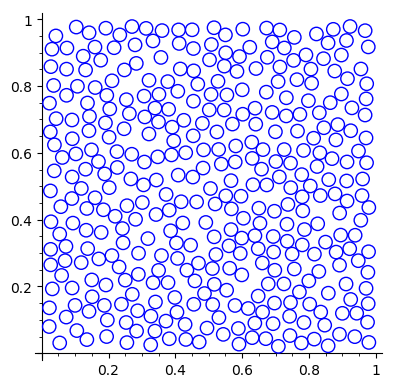

Liczba kół:  365
Stosunek sumy pól kół do pola kwadratu (koncentracja) :  0.458672527424110


In [34]:
symulacja(400, 0.02, 100)

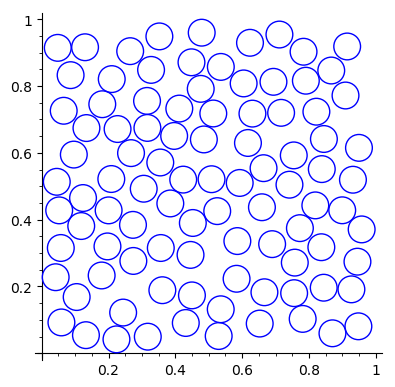

Liczba kół:  95
Stosunek sumy pól kół do pola kwadratu (koncentracja) :  0.477522083345649


In [24]:
symulacja(100, 0.04, 500)

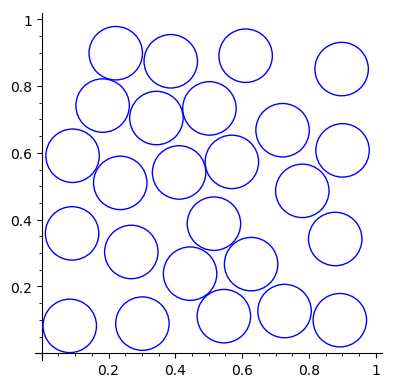

Liczba kół:  25
Stosunek sumy pól kół do pola kwadratu (koncentracja) :  0.502654824574367


In [9]:
symulacja(45, 0.08, 500)

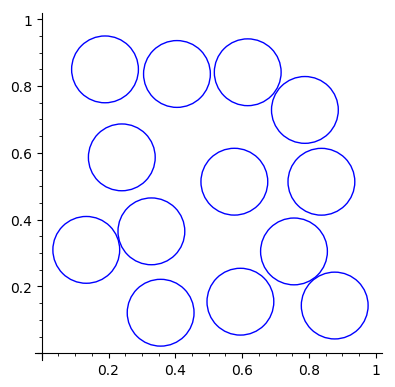

Liczba kół:  13
Stosunek sumy pól kół do pola kwadratu (koncentracja) :  0.408407044966673


In [37]:
symulacja(22, 0.1, 200)

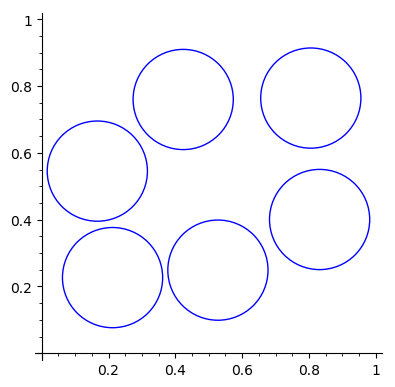

Liczba kół:  6
Stosunek sumy pól kół do pola kwadratu (koncentracja) :  0.424115008234622


In [36]:
symulacja(10, 0.15, 100)

Funkcja przeprowadzająca symulację bez rysowania wykresu.

In [10]:
def symulacja_bez_wykresu(n, r, max_try):
    v= losuj_punkty(n, r, max_try)
    u=len(v)
    return (r, u)

Funkcja przeprowadzająca wiele symulacji dla podanych liczby kół, które chcemy włożyć w kwadrat oraz promienia.

In [11]:
def wiele_symulacji_lista(lista_par_ilosci_i_promieni , max_try):
    return [symulacja_bez_wykresu(punkt[0], punkt[1], max_try) for punkt in lista_par_ilosci_i_promieni]

In [12]:
lista_punktow = [(30, 0.08), (19,0.17), (60, 0.06) ,(50, 0.07), (15, 0.13) ,(30, 0.09) ,(20, 0.12) ,(10, 0.18),(7, 0.22),(100, 0.04), (10,0.15), (6,0.25), (10,0.2), (20,0.1), (70,0.05), (180,0.03),(270,0.025)]
wiele_symulacji = wiele_symulacji_lista(lista_punktow, 200)

Grafika przedstawiająca ilość kół, które można wpisać w kwadrat jednostkowy jako funkcja długości promienia. Na osi Ox znajduje się długość promienia, a na osi Oy ilość kół, które udało się wpisać w kwadrat dla takiej długośći promienia. Widzimy, że kiedy promień rośnie ilość kół, które udało się wpisać szybko spada.

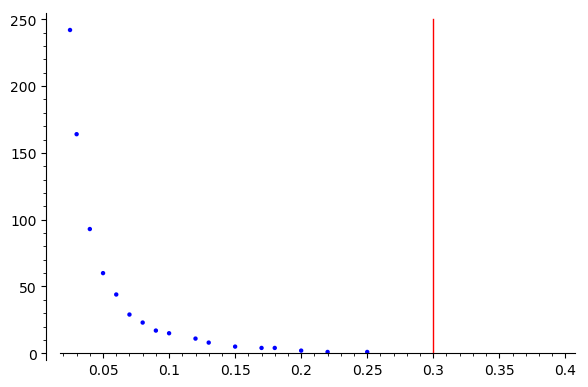

In [13]:
show(points(wiele_symulacji, xmax=0.4) + line([(0.3, 0),(0.3, 250)], color = 'red'))

Poniżej spróbujemy dopasować funkcję do powyższych punktów. Skorzystamy w tym celu z funkcji curve_fit z biblioteki scipy. Poniżej znajdują się też pomocnicze funkcje manipulujące listami aby móc zastosować funkcję curve_fit.

In [14]:
def lista_x_i_lista_y( lista_punktow):
    n=len(lista_punktow)
    return [ [lista_punktow[i][0] for i in range(n)],[lista_punktow[i][1] for i in range(n) ]  ]

In [15]:
def sortuj_punkty(lista):
    n= len(lista)
    tymcz = [( lista[i][1], lista[i][0] ) for i in range(n)]
    tymcz.sort()
    return ([( tymcz[i][1], tymcz[i][0] ) for i in range(n)])

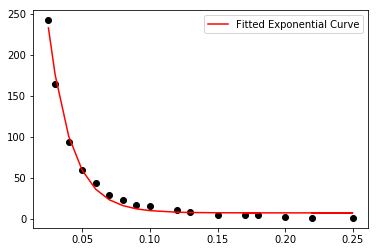

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

posortowane_punkty = sortuj_punkty(wiele_symulacji)

lista_xy = lista_x_i_lista_y(posortowane_punkty)

x = lista_xy[0]
y = lista_xy[1]

popt, pcov = curve_fit(func, x, y)

plt.figure()
plt.plot(x, y, 'ko')
plt.plot(x, [func(t, *popt) for t in x], 'r-', label="Fitted Exponential Curve")

plt.legend()
plt.show()

Jak widzimy, czerowna krzywa dobrze opisuje zachowanie naszych punktów.

In [17]:
print("Na powyższym wykresie znajduje się funkcja eksponencjalna postaci y= a*exp(-b*x)+c, przy czym ")
print("a = ",popt[0],", b = ",popt[1], ", c = ", popt[2])

Na powyższym wykresie znajduje się funkcja eksponencjalna postaci y= a*exp(-b*x)+c, przy czym 
a =  981.2239083083397 , b =  58.81165025513142 , c =  7.135981948760979


Przyjrzyjmy się jeszcze wykresowi otrzymanej funkcji bez punktów na wykresie.

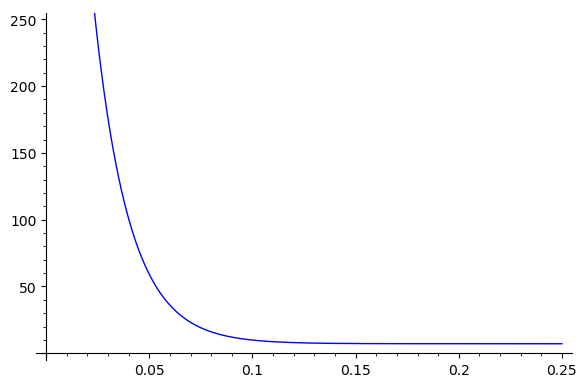

In [18]:
plot( lambda x: popt[0]*exp(-popt[1]*x)+popt[2], xmin=0, xmax=0.25, ymin =0, ymax=250)